In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import sys

In [5]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
import importlib
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [6]:
# fname="atlas_phase_fits_orbs_17_6_2021.csv"
fname="atlas_phase_fits_orbs_1_7_2021.csv"

In [7]:
# load the dataframe of our phase fits, including orbital elements columns (astorb)
df_atlas=dbt.load_atlas_phase_fits_orbs(fname)

In [8]:
df_atlas

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_3M10_o,phase_curve_OC_std_B89_c,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,mpc_number.1,name.1,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,NaN,0.174245,0.155100,0.177920,0.151089,1.0,Ceres,2.765655,0.078394,10.588194
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,2.0,Pallas,2.773779,0.229762,34.898656
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.175842,0.082961,0.174667,0.081671,0.174817,3.0,Juno,2.668151,0.256965,12.991481
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,4.0,Vesta,2.361650,0.088349,7.141542
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.093109,0.095036,0.093920,0.094819,0.093835,5.0,Astraea,2.573926,0.190614,5.367599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,0.114588,0.023317,506906.0,2008 CK194,1.895502,0.061007,19.145688
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.096242,NaN,0.094321,0.040713,549516.0,2011 KP48,3.132320,0.111520,9.487708
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.216665,NaN,0.216665,0.144186,0.216665,550221.0,2012 CK5,2.699094,0.290774,13.435808
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,0.074179,0.000295,551041.0,2012 VB7,1.872771,0.067888,17.850431


# check that atlas_phase_fits and orbital_elements are correctly combined

In [9]:
mask=df_atlas["mpc_number"]==df_atlas["mpc_number.1"]
df_mpc_test=df_atlas[~mask][["mpc_number","mpc_number.1","name","name.1"]]

In [10]:
if (df_mpc_test["name"].equals(df_mpc_test["name.1"])) and (df_atlas["name"].equals(df_atlas["name.1"])):
    print("database is correct, drop duplicate columns")
    df_atlas = df_atlas.drop(["mpc_number.1","name.1"],axis=1)

database is correct, drop duplicate columns


# look at a particular model + filter

In [11]:
model="P16"
filt="o"
model_filt="{}_{}".format(model,filt)

In [12]:
# add some more useful columns
df_atlas=dbt.atlas_phase_fits_new_cols(df_atlas,model=model,filt=filt)

In [13]:
model_params=[x for x in list(df_atlas) if "_{}".format(model_filt) in x]
print(model_params)
print(len(model_params))

['phase_curve_G12_P16_o', 'phase_curve_G12_err_P16_o', 'phase_curve_H_P16_o', 'phase_curve_H_err_P16_o', 'phase_curve_N_alpha_low_P16_o', 'phase_curve_N_fit_P16_o', 'phase_curve_N_iter_P16_o', 'phase_curve_N_mag_err_P16_o', 'phase_curve_N_nights_P16_o', 'phase_curve_alpha_max_P16_o', 'phase_curve_alpha_min_P16_o', 'phase_curve_ier_P16_o', 'phase_curve_nfev_P16_o', 'phase_curve_OC_mean_P16_o', 'phase_curve_OC_range_P16_o', 'phase_curve_OC_std_P16_o', 'phase_angle_range_P16_o', 'phase_curve_frac_good_fit_P16_o']
18


In [14]:
# print(list(df_atlas))
print(len(list(df_atlas)))

153


In [15]:
%matplotlib inline

0 0 0 phase_curve_G12_P16_o
1 0 1 phase_curve_G12_err_P16_o
2 0 2 phase_curve_H_P16_o
3 0 3 phase_curve_H_err_P16_o
4 0 4 phase_curve_N_alpha_low_P16_o
5 1 0 phase_curve_N_fit_P16_o
6 1 1 phase_curve_N_iter_P16_o
7 1 2 phase_curve_N_mag_err_P16_o
8 1 3 phase_curve_N_nights_P16_o
9 1 4 phase_curve_alpha_max_P16_o
10 2 0 phase_curve_alpha_min_P16_o
11 2 1 phase_curve_ier_P16_o
12 2 2 phase_curve_nfev_P16_o
13 2 3 phase_curve_OC_mean_P16_o
14 2 4 phase_curve_OC_range_P16_o
15 3 0 phase_curve_OC_std_P16_o
16 3 1 phase_angle_range_P16_o
17 3 2 phase_curve_frac_good_fit_P16_o


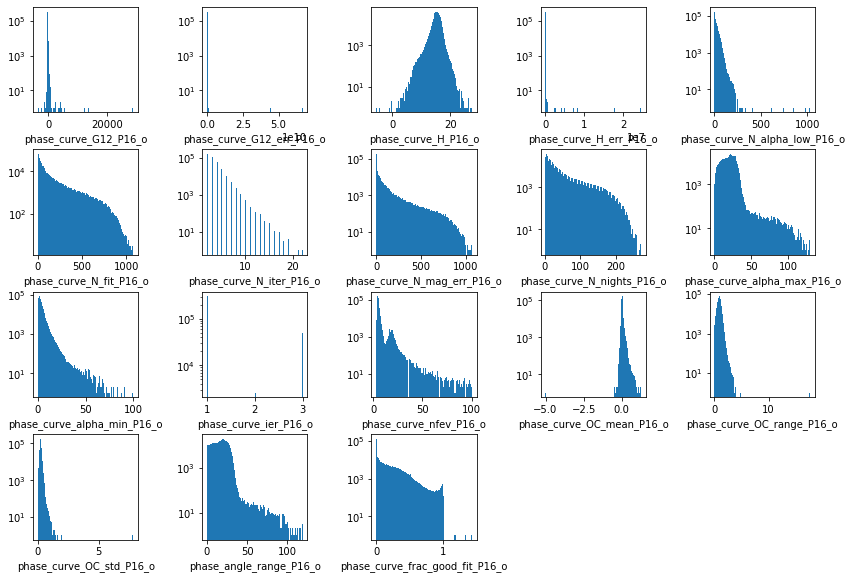

In [16]:
x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_atlas,x_fig,y_fig,model_params,n_bins,plot_log)

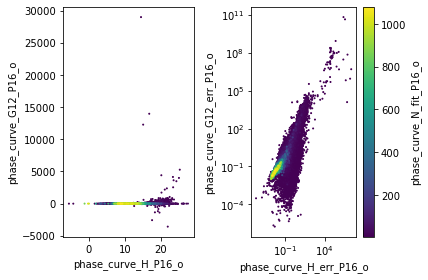

In [17]:
x_plot1="phase_curve_H_P16_o"
y_plot1="phase_curve_G12_P16_o"
x_plot2="phase_curve_H_err_P16_o"
y_plot2="phase_curve_G12_err_P16_o"

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax2.set_xscale("log")
ax2.set_yscale("log")

plt.tight_layout()

# Investigate the nans

In [18]:
df_atlas

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_3M10_o,phase_curve_OC_std_B89_c,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_P16_o,phase_curve_frac_good_fit_P16_o
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,NaN,0.174245,0.155100,0.177920,0.151089,2.765655,0.078394,10.588194,9.9473,1.000000
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,2.773779,0.229762,34.898656,9.8451,1.000000
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.175842,0.082961,0.174667,0.081671,0.174817,2.668151,0.256965,12.991481,25.7409,1.000000
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,2.361650,0.088349,7.141542,3.8014,1.333333
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.093109,0.095036,0.093920,0.094819,0.093835,2.573926,0.190614,5.367599,17.6548,0.989583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,0.114588,0.023317,1.895502,0.061007,19.145688,0.0175,0.000000
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.096242,NaN,0.094321,0.040713,3.132320,0.111520,9.487708,0.2506,0.000000
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.216665,NaN,0.216665,0.144186,0.216665,2.699094,0.290774,13.435808,0.0106,0.000000
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,0.074179,0.000295,1.872771,0.067888,17.850431,1.4280,0.000000


In [19]:
# some objects have nans for some metrics (should have values if the fit was successful!)
df_atlas[["mpc_number","name"]+model_params][df_atlas[model_params].isna().any(axis=1)]

,mpc_number,name,phase_curve_G12_P16_o,phase_curve_G12_err_P16_o,phase_curve_H_P16_o,phase_curve_H_err_P16_o,phase_curve_N_alpha_low_P16_o,phase_curve_N_fit_P16_o,phase_curve_N_iter_P16_o,phase_curve_N_mag_err_P16_o,phase_curve_N_nights_P16_o,phase_curve_alpha_max_P16_o,phase_curve_alpha_min_P16_o,phase_curve_ier_P16_o,phase_curve_nfev_P16_o,phase_curve_OC_mean_P16_o,phase_curve_OC_range_P16_o,phase_curve_OC_std_P16_o,phase_angle_range_P16_o,phase_curve_frac_good_fit_P16_o
1,2.0,Pallas,0.552526,0.770143,3.96836,0.086262,0.0,6.0,3.0,6.0,5.0,24.7586,14.9135,3.0,4.0,NaN,NaN,NaN,9.8451,1.000000
3,4.0,Vesta,6.389460,0.388786,3.81667,0.077181,0.0,3.0,3.0,4.0,2.0,22.4506,18.6492,3.0,18.0,NaN,NaN,NaN,3.8014,1.333333
353,354.0,Eleonora,0.410450,0.441412,5.70637,0.038068,0.0,18.0,2.0,1.0,12.0,22.8822,10.6938,1.0,4.0,NaN,NaN,NaN,12.1884,0.055556
2059,2063.0,Bacchus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,2101.0,Adonis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434014,311746.0,2006 TT25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434016,314836.0,2006 UK131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434018,326716.0,2003 ED16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434022,386252.0,2008 CR15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# only a subset of objects have all nans for P16 (failed to fit completely)
df_atlas[model_params][df_atlas[model_params].isna().all(axis=1)]

,phase_curve_G12_P16_o,phase_curve_G12_err_P16_o,phase_curve_H_P16_o,phase_curve_H_err_P16_o,phase_curve_N_alpha_low_P16_o,phase_curve_N_fit_P16_o,phase_curve_N_iter_P16_o,phase_curve_N_mag_err_P16_o,phase_curve_N_nights_P16_o,phase_curve_alpha_max_P16_o,phase_curve_alpha_min_P16_o,phase_curve_ier_P16_o,phase_curve_nfev_P16_o,phase_curve_OC_mean_P16_o,phase_curve_OC_range_P16_o,phase_curve_OC_std_P16_o,phase_angle_range_P16_o,phase_curve_frac_good_fit_P16_o
2059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# drop the rows that have nans for ALL params for that model and filter

In [21]:
df_atlas=df_atlas[~df_atlas[model_params].isna().all(axis=1)]

In [22]:
len(df_atlas)

356670

# Cut centaurs and distant objects

In [23]:
J_aphelion = 5.46 # Jupiter aphelion
J_perihelion = 4.95
mask=(df_atlas["a_semimajor_axis"]>J_aphelion)
df_outer = df_atlas[mask]

In [24]:
df_outer[["mpc_number","name","phase_curve_H_P16_o","phase_curve_G12_P16_o","detection_count"]]

,mpc_number,name,phase_curve_H_P16_o,phase_curve_G12_P16_o,detection_count
943,944.0,Hidalgo,10.350600,0.791857,894.0
2056,2060.0,Chiron,5.348540,0.488496,1080.0
10153,10199.0,Chariklo,6.418290,1.345840,740.0
36984,37117.0,Narcissus,12.992200,1.025310,371.0
38485,38628.0,Huya,4.407910,0.995238,674.0
44428,44594.0,1999 OX3,6.689280,1.178880,421.0
47001,47171.0,Lempo,4.500310,1.488740,455.0
54399,54598.0,Bienor,7.044190,0.872699,792.0
55361,55565.0,2002 AW197,2.727970,0.171553,122.0
55431,55636.0,2002 TX300,3.400630,5.276560,454.0


# look at orbital dist of all objects

In [25]:
%matplotlib notebook

In [26]:
%matplotlib inline

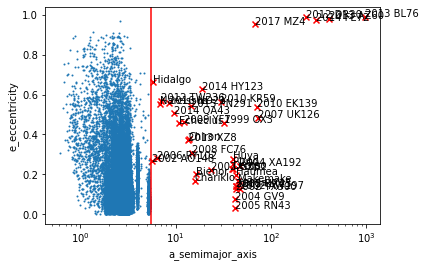

In [27]:
x_plot="a_semimajor_axis"
y_plot="e_eccentricity"
# y_plot="i_inclination_deg"

df_plot=df_atlas[~mask]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)
ax1.scatter(df_outer[x_plot],df_outer[y_plot],c="r",marker="x",alpha=1)

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

ax1.set_xscale("log")
# ax1.set_ylim(0,1)

ax1.axvline(J_aphelion,c="r")

# label selected points

for i in range(len(df_outer)):
    ax1.text(df_outer.iloc[i][x_plot],df_outer.iloc[i][y_plot],df_outer.iloc[i]["name"])
    
# ax1.legend()

# ax1.set_xlim(5,7)

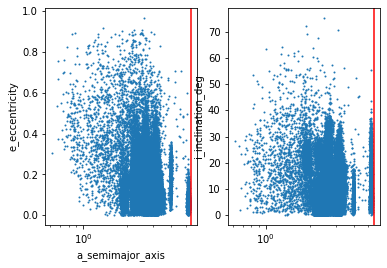

In [28]:
x_plot="a_semimajor_axis"
y_plot1="e_eccentricity"
y_plot2="i_inclination_deg"

df_plot=df_atlas[~mask]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot[x_plot],df_plot[y_plot1],s=1,alpha=1)
ax2.scatter(df_plot[x_plot],df_plot[y_plot2],s=1,alpha=1)

ax1.set_ylabel(y_plot1)
ax1.set_xlabel(x_plot)
ax2.set_ylabel(y_plot2)

ax1.set_xscale("log")
ax2.set_xscale("log")

# ax1.set_ylim(0,1)

ax1.axvline(J_aphelion,c="r")
ax2.axvline(J_aphelion,c="r")

# Analyse the inner asteroids only

In [29]:
df_atlas=df_atlas[~mask]

In [30]:
len(df_atlas)

356630

In [32]:
df_atlas["q_perihelion"] = df_atlas["a_semimajor_axis"]*(1.0 - df_atlas["e_eccentricity"])

In [33]:
df_atlas.sort_values("a_semimajor_axis")[["mpc_number","name","a_semimajor_axis","detection_count"]]

,mpc_number,name,a_semimajor_axis,detection_count
295939,418265.0,2008 EA32,0.615936,44.0
135574,138127.0,2000 EE14,0.661787,160.0
405908,437844.0,1999 MN,0.673885,45.0
279317,364136.0,2006 CJ,0.676528,18.0
340451,413563.0,2005 TG45,0.681417,69.0
...,...,...,...,...
181989,192966.0,2000 CS140,5.362466,200.0
83517,83984.0,2002 GL77,5.367196,369.0
389969,295904.0,2008 WP92,5.368421,20.0
183936,195467.0,2002 GT114,5.373286,326.0


In [34]:
len(df_atlas[df_atlas["q_perihelion"]<=1.3])

1907

In [123]:
df_apollo = df_atlas[df_atlas["q_perihelion"]<1.017].sort_values("e_eccentricity")
# df_apollo[["mpc_number","name","a_semimajor_axis","e_eccentricity","q_perihelion","detection_count"]]#.iloc[-10:]
df_apollo[["mpc_number","name"]]
df_apollo.to_csv("df_atlas_apollos.csv")

In [127]:
df_eccentrics = df_atlas[df_atlas["q_perihelion"]>1.017].sort_values("e_eccentricity").iloc[-1000:]
df_eccentrics[["mpc_number","name","a_semimajor_axis","e_eccentricity","q_perihelion","detection_count"]]
df_eccentrics.to_csv("df_atlas_eccentrics.csv")

In [128]:
list(df_atlas)

['dateLastModified',
 'detection_count',
 'detection_count_c',
 'detection_count_o',
 'last_detection_mjd',
 'last_photometry_update_date_c',
 'last_photometry_update_date_o',
 'mpc_number',
 'name',
 'orbital_elements_id',
 'phase_angle_range_c',
 'phase_angle_range_o',
 'phase_curve_G12_2M10_c',
 'phase_curve_G12_2M10_o',
 'phase_curve_G12_P16_c',
 'phase_curve_G12_P16_o',
 'phase_curve_G12_err_2M10_c',
 'phase_curve_G12_err_2M10_o',
 'phase_curve_G12_err_P16_c',
 'phase_curve_G12_err_P16_o',
 'phase_curve_G1_3M10_c',
 'phase_curve_G1_3M10_o',
 'phase_curve_G1_err_3M10_c',
 'phase_curve_G1_err_3M10_o',
 'phase_curve_G2_3M10_c',
 'phase_curve_G2_3M10_o',
 'phase_curve_G2_err_3M10_c',
 'phase_curve_G2_err_3M10_o',
 'phase_curve_G_B89_c',
 'phase_curve_G_B89_o',
 'phase_curve_G_err_B89_c',
 'phase_curve_G_err_B89_o',
 'phase_curve_H_2M10_c',
 'phase_curve_H_2M10_o',
 'phase_curve_H_3M10_c',
 'phase_curve_H_3M10_o',
 'phase_curve_H_B89_c',
 'phase_curve_H_B89_o',
 'phase_curve_H_P16_c',


# First cut is on number of detections

In [33]:
N_fit_cut=100

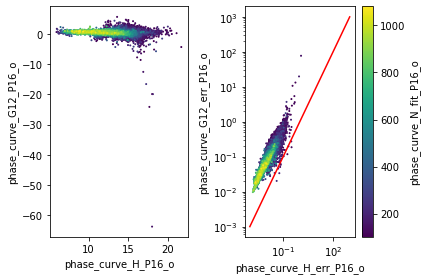

In [34]:
x_plot1="phase_curve_H_P16_o"
y_plot1="phase_curve_G12_P16_o"
x_plot2="phase_curve_H_err_P16_o"
y_plot2="phase_curve_G12_err_P16_o"

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax2.set_xscale("log")
ax2.set_yscale("log")

x_grid=np.logspace(-3,3)
ax2.plot(x_grid,x_grid,c="r")

plt.tight_layout()

129555


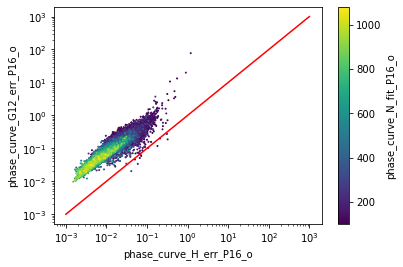

In [35]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
print(len(df_plot))
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

Unlike B89, the errors in P16 do not follow a 1:1 trend, they are offset. Accuracy in G12 is not as good as accuracy in H.

# Cut on N_alpha_low

In [36]:
df_N_fit_cut=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]

In [37]:
%matplotlib notebook

In [38]:
%matplotlib inline

In [39]:
N_alpha_low_cut=1

11455
11946


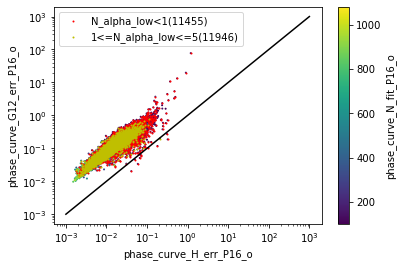

In [40]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"
# c_plot="phase_curve_N_alpha_low_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

df_plot2=df_plot[df_plot["phase_curve_N_alpha_low_P16_o"]<N_alpha_low_cut]
df_plot3=df_plot[(df_plot["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)
                & (df_plot["phase_curve_N_alpha_low_P16_o"]<=8)]

print(len(df_plot2))
print(len(df_plot3))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r",label="N_alpha_low<1({})".format(len(df_plot2)))
ax1.scatter(df_plot3[x_plot],df_plot3[y_plot],s=1,c="y",label="1<=N_alpha_low<=5({})".format(len(df_plot3)))

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="k")

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.legend()

The biggest gain in outlier rejection comes from dropping fits with N_alpha_low=0

But should we still trust any fits that don't have multiple ATLAS tracklets at low phase?

118100


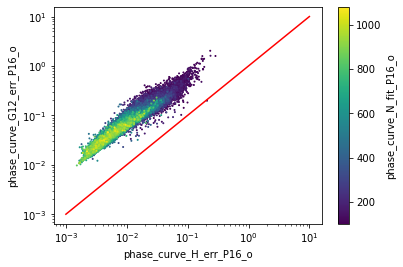

In [41]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)
print(len(df_plot))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

# Error Distribution vs metric analysis
Start with N_fit

In [42]:
%matplotlib notebook

In [43]:
%matplotlib inline

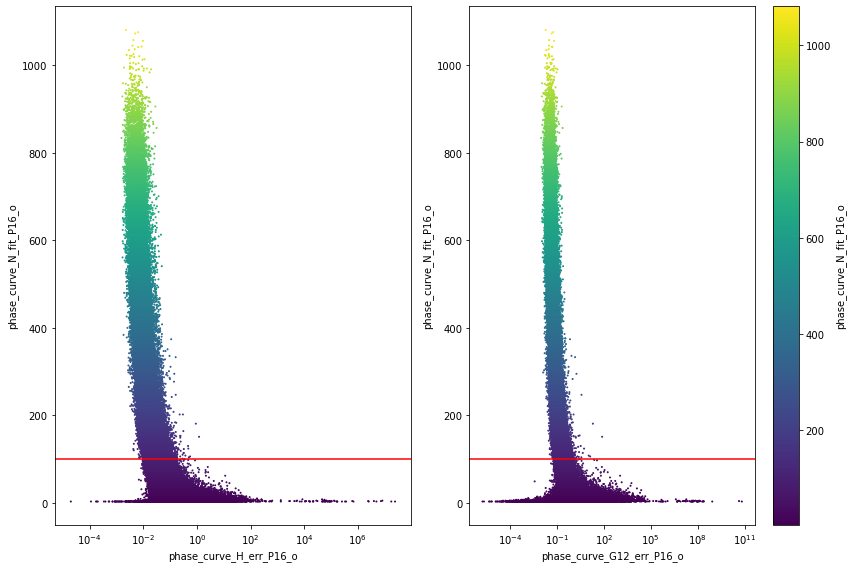

In [44]:
x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_curve_N_fit_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas#[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure(figsize=(12,8))
# fig.set_size(6,3)
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_fit_cut,c="r")
ax2.axhline(N_fit_cut,c="r")

plt.tight_layout()

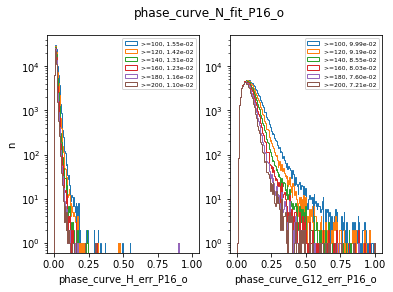

In [45]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharey=ax1)

fig.suptitle("phase_curve_N_fit_P16_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
# bins=np.linspace(0,1,100) # choose bins such that limits are set
bins=np.linspace(0,1,200) # choose bins such that limits are set

# for N_fit_cut in np.arange(0,200+20,20):
# for N_fit_cut in np.arange(0,400+50,50):
for N_fit_cut in np.arange(100,200+20,20):
    df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(N_fit_cut,np.median(df_plot[x_plot1])))
    x=ax2.hist(df_plot[x_plot2],bins=bins,log=True,histtype="step",
              label=">={}, {:.2e}".format(N_fit_cut,np.median(df_plot[x_plot2])))

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.legend(fontsize=6)
ax2.legend(fontsize=6)

71911


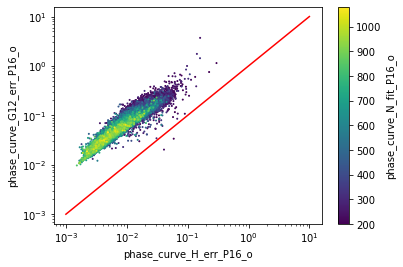

In [46]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)]
df_plot=df_plot.sort_values(c_plot)
print(len(df_plot))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

0 0 0 phase_curve_G12_P16_o
1 0 1 phase_curve_G12_err_P16_o
2 0 2 phase_curve_H_P16_o
3 0 3 phase_curve_H_err_P16_o
4 0 4 phase_curve_N_alpha_low_P16_o
5 1 0 phase_curve_N_fit_P16_o
6 1 1 phase_curve_N_iter_P16_o
7 1 2 phase_curve_N_mag_err_P16_o
8 1 3 phase_curve_N_nights_P16_o
9 1 4 phase_curve_alpha_max_P16_o
10 2 0 phase_curve_alpha_min_P16_o
11 2 1 phase_curve_ier_P16_o
12 2 2 phase_curve_nfev_P16_o
13 2 3 phase_curve_OC_mean_P16_o
14 2 4 phase_curve_OC_range_P16_o
15 3 0 phase_curve_OC_std_P16_o
16 3 1 phase_angle_range_P16_o
17 3 2 phase_curve_frac_good_fit_P16_o


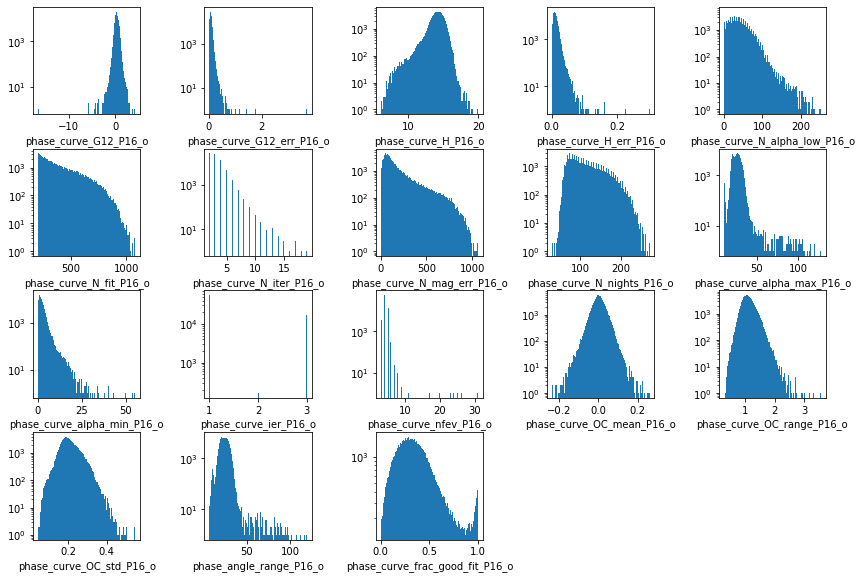

In [47]:
df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)]

x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_plot,x_fig,y_fig,model_params,n_bins,plot_log)

# Consider number of data points with phase angle < 5 degrees

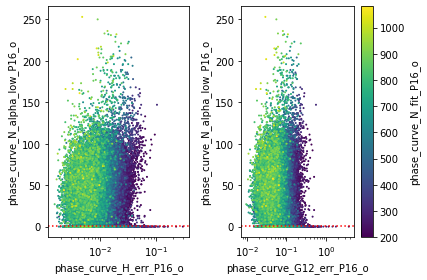

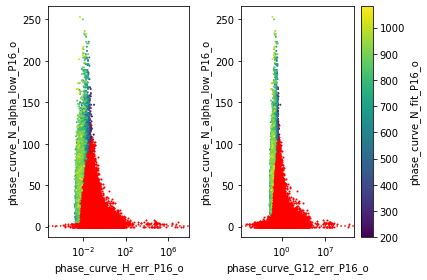

In [48]:
x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_curve_N_alpha_low_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

# df_plot2=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]<N_fit_cut]
# ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],c="r",s=1)
# ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],c="r",s=1)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_alpha_low_cut,c="r",ls=":")
ax2.axhline(N_alpha_low_cut,c="r",ls=":")

plt.tight_layout()

x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_curve_N_alpha_low_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

df_plot2=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]<N_fit_cut]
ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],c="r",s=1)
ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],c="r",s=1)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_alpha_low_cut,c="r",ls=":")
ax2.axhline(N_alpha_low_cut,c="r",ls=":")

plt.tight_layout()

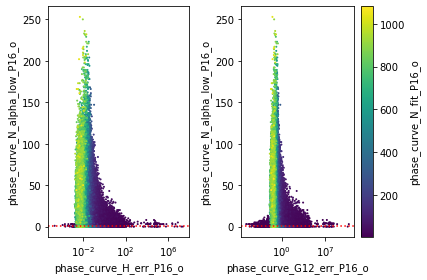

In [49]:
x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_curve_N_alpha_low_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas#[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

# df_plot2=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]<N_fit_cut]
# ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],c="r",s=1)
# ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],c="r",s=1)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_alpha_low_cut,c="r",ls=":")
ax2.axhline(N_alpha_low_cut,c="r",ls=":")

plt.tight_layout()

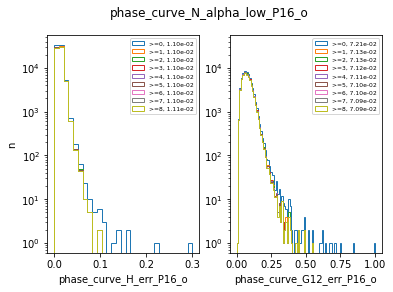

In [50]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharey=ax1)

fig.suptitle("phase_curve_N_alpha_low_P16_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
bins1=np.linspace(0,0.3,30) # choose bins such that limits are set
bins2=np.linspace(0,1,100) # choose bins such that limits are set

# for N_alph_cut in np.arange(0,50,10):
for N_alph_cut in range(8+1):
    df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                    & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alph_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins1,log=True,histtype="step",
               label=">={}, {:.2e}".format(N_alph_cut,np.median(df_plot[x_plot1])))
    x=ax2.hist(df_plot[x_plot2],bins=bins2,log=True,histtype="step",
              label=">={}, {:.2e}".format(N_alph_cut,np.median(df_plot[x_plot2])))

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.legend(fontsize=6)
ax2.legend(fontsize=6)

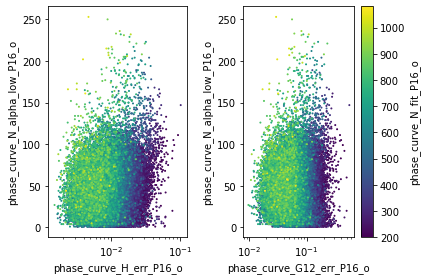

In [51]:
x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_curve_N_alpha_low_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()

67550


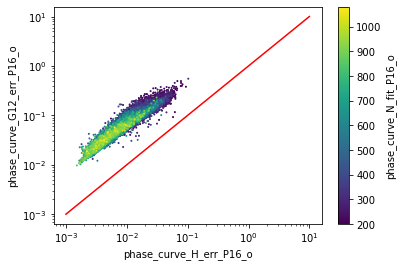

In [52]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)
print(len(df_plot))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

# Consider OC metrics

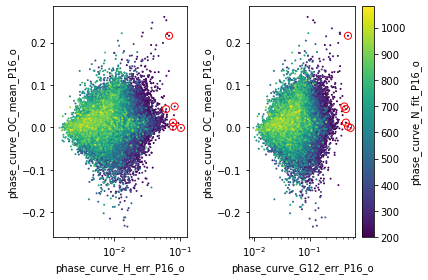

In [53]:
x_plot1="phase_curve_H_err_P16_o"
# y_plot1="phase_curve_OC_std_P16_o"
# y_plot1="phase_curve_OC_range_P16_o"
y_plot1="phase_curve_OC_mean_P16_o"

x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

# df_plot=df_atlas
df_plot=df_atlas[(df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

df_plot2=df_plot[df_plot["phase_curve_G12_err_P16_o"]>0.4]
s1=ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],s=50,edgecolor="r",facecolor="none")
s2=ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=50,edgecolor="r",facecolor="none")

plt.tight_layout()

In [54]:
df_plot[np.absolute(df_plot["phase_curve_OC_std_P16_o"])>0.45].sort_values("phase_curve_OC_std_P16_o")[["name",
                                                  "phase_curve_N_alpha_low_P16_o",
                                                 "phase_curve_alpha_min_P16_o","detection_count_o",
                                                 "phase_curve_N_fit_P16_o","phase_curve_OC_std_P16_o"]]

,name,phase_curve_N_alpha_low_P16_o,phase_curve_alpha_min_P16_o,detection_count_o,phase_curve_N_fit_P16_o,phase_curve_OC_std_P16_o
75970,2000 EJ150,23.0,1.3659,297.0,228.0,0.450147
91830,2000 MV3,17.0,1.0724,247.0,214.0,0.452335
31983,2000 KF52,25.0,1.7632,283.0,263.0,0.454624
13378,1999 VM36,41.0,0.6904,315.0,279.0,0.460662
52110,Mommsen,7.0,2.2284,282.0,245.0,0.463766
78792,1993 QN,4.0,1.9180,252.0,224.0,0.475674
352106,2002 HK12,12.0,4.6254,248.0,243.0,0.483807
104240,2000 OL46,28.0,1.5992,284.0,207.0,0.484938
136920,2001 QE74,44.0,0.6901,314.0,273.0,0.489122
55751,1998 HK109,20.0,0.3786,313.0,285.0,0.494016


In [55]:
df_plot[np.absolute(df_plot["phase_curve_OC_mean_P16_o"])>0.2].sort_values("phase_curve_OC_mean_P16_o")[["name",
                                                  "phase_curve_N_alpha_low_P16_o",
                                                 "phase_curve_alpha_min_P16_o","detection_count_o",
                                                 "phase_curve_N_fit_P16_o","phase_curve_OC_mean_P16_o"]]

,name,phase_curve_N_alpha_low_P16_o,phase_curve_alpha_min_P16_o,detection_count_o,phase_curve_N_fit_P16_o,phase_curve_OC_mean_P16_o
25836,2001 DC74,25.0,1.2113,541.0,357.0,-0.234175
69720,1999 CL85,29.0,0.9985,456.0,417.0,-0.232006
69351,1998 FQ122,34.0,1.0815,342.0,325.0,-0.219112
89159,2002 AS21,40.0,2.5315,372.0,357.0,-0.215310
21181,1996 KL1,33.0,2.3127,419.0,341.0,-0.212647
16675,Antonioleone,19.0,3.2145,545.0,506.0,-0.212432
17882,1999 JB20,95.0,0.7899,641.0,572.0,-0.202768
2643,Elinor,38.0,3.4364,833.0,461.0,0.204815
45018,1999 XL155,24.0,2.6468,443.0,299.0,0.214992
20630,1999 XB44,60.0,0.2884,256.0,206.0,0.216293


In [56]:
df_plot[np.absolute(df_plot["phase_curve_OC_range_P16_o"])>2.5].sort_values("phase_curve_OC_range_P16_o")[["name",
                                                  "phase_curve_N_alpha_low_P16_o",
                                                 "phase_curve_alpha_min_P16_o","detection_count_o",
                                                 "phase_curve_N_fit_P16_o","phase_curve_OC_range_P16_o"]]

,name,phase_curve_N_alpha_low_P16_o,phase_curve_alpha_min_P16_o,detection_count_o,phase_curve_N_fit_P16_o,phase_curve_OC_range_P16_o
85513,1999 NC43,17.0,2.2892,247.0,207.0,2.56222
9255,Johannes,35.0,1.8695,423.0,405.0,2.68806
5170,1990 UQ,18.0,2.9993,389.0,375.0,2.69071
150186,2002 TB9,13.0,1.3455,208.0,200.0,2.71634
352106,2002 HK12,12.0,4.6254,248.0,243.0,2.89097
12486,1998 OH,5.0,2.7342,751.0,579.0,2.95663
352408,2001 WN5,5.0,3.4212,239.0,206.0,3.02708
17112,1999 VU,5.0,3.1499,221.0,218.0,3.55587


# check out phase angle range
Check out B89 analysis for the phase angle distribution.

Cutting phase angle range does not appear to improve the errors in H and G

210


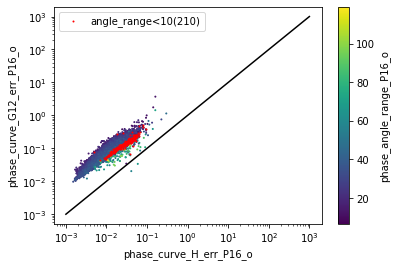

In [57]:
x_plot="phase_curve_H_err_P16_o"
y_plot="phase_curve_G12_err_P16_o"
# c_plot="phase_curve_N_fit_P16_o"
c_plot="phase_angle_range_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

angle_range_low_cut=10
df_plot2=df_plot[df_plot["phase_angle_range_P16_o"]<angle_range_low_cut]

print(len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r",
            label="angle_range<{}({})".format(angle_range_low_cut,len(df_plot2)))

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="k")

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.legend()

A cut in phase angle range disproportionately removes the Trojans

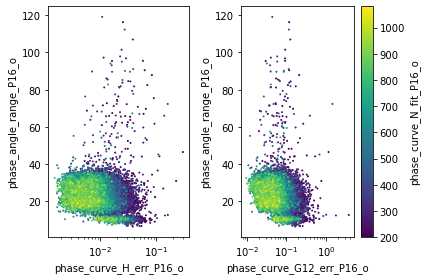

In [58]:
x_plot1="phase_curve_H_err_P16_o"
y_plot1="phase_angle_range_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")


plt.tight_layout()

Note the somewhat bimodal distribution in phase angle range, the peak at around 10 degrees is from the Jupiter Trojans.

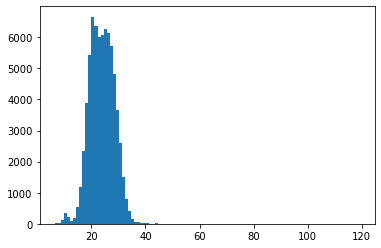

In [59]:
df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
x=plt.hist(df_plot["phase_angle_range_P16_o"],bins=100)

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'a_semimajor_axis')

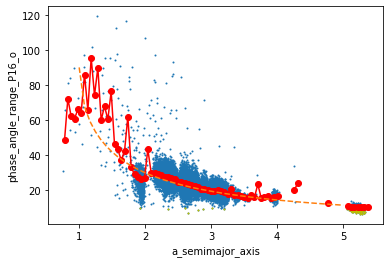

In [60]:
x_plot="a_semimajor_axis"
y_plot="phase_angle_range_P16_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut]
# df_plot=df_plot.sort_values(c_plot)

angle_range_low_cut=10
df_plot2=df_plot[df_plot["phase_angle_range_P16_o"]<angle_range_low_cut]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)
ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,alpha=1,c="y")

# Sort data by x axis, semimajor axis
df_plot=df_plot.sort_values("a_semimajor_axis")
data_x=np.array(df_plot["a_semimajor_axis"])
data_y=np.array(df_plot["phase_angle_range_P16_o"])

# find the binned mean or median
bins=np.linspace(0.5,5.5,100)
digitized=np.digitize(data_x,bins=bins)
# bin_means = [np.mean(data_y[digitized == i]) for i in range(1, len(bins))]
bin_means = [np.median(data_y[digitized == i]) for i in range(1, len(bins))]
cent_bins_x=(bins[1:]+bins[:-1])/2.0
ax1.plot(cent_bins_x,bin_means,c="r")
ax1.scatter(cent_bins_x,bin_means,c="r")

# plot max phase angle
a_AU=np.linspace(1,5)
ax1.plot(a_AU,np.degrees(np.arcsin(1.0/a_AU)),c='C1',ls="--")

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

In [61]:
 def error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=[]):
        
    fig = plt.figure()
    fig.set_size_inches(2*4,len(y_plot_list)*3)

    if c_plot!=None:
        gs = gridspec.GridSpec(len(y_plot_list)+1,2,height_ratios=([1]*len(y_plot_list)+[0.1]))
        df_plot=df_plot.sort_values(c_plot)
    else:
        gs = gridspec.GridSpec(len(y_plot_list),2)


    for i,y_plot in enumerate(y_plot_list):
                           
        ax1 = plt.subplot(gs[i,0])
        ax2 = plt.subplot(gs[i,1])

        y_plot1=y_plot
        y_plot2=y_plot

        if c_plot!=None:
            col_plot=df_plot[c_plot]
        else:
            col_plot="C0"
            
        s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=col_plot)
        s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=col_plot)

        if len(df_cut)>0:
            s1=ax1.scatter(df_cut[x_plot1],df_cut[y_plot1],s=1,c="r")
            s2=ax2.scatter(df_cut[x_plot2],df_cut[y_plot2],s=1,c="r")
            
#         ax1.set_xlabel(x_plot1)
#         ax2.set_xlabel(x_plot2)
        ax1.set_ylabel(y_plot1)
#         ax2.set_ylabel(y_plot2)

        ax1.set_xscale("log")
        ax2.set_xscale("log")

    ax1.set_xlabel(x_plot1)
    ax2.set_xlabel(x_plot2)
    
    if c_plot!=None:
        ax_cbar = plt.subplot(gs[i+1,:])
        cbar=plt.colorbar(s2,ax_cbar,use_gridspec=True,orientation='horizontal')
        cbar.set_label(c_plot)

    plt.tight_layout()
    plt.show()

In [62]:
N_fit_cut=100
N_alpha_low_cut=1

118100 238530


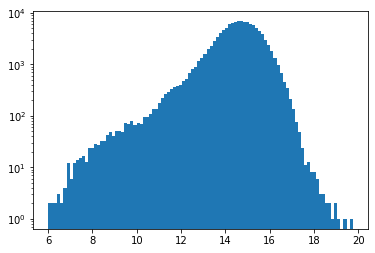

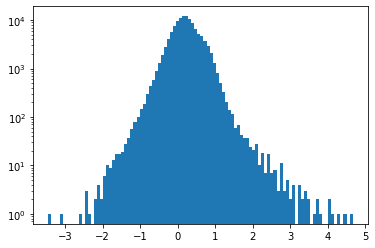

In [63]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

y_plot_list=["phase_curve_H_P16_o","phase_curve_G12_P16_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

print(len(df_plot),len(df_cut))

x=plt.hist(df_plot["phase_curve_H_P16_o"],bins=100,log=True)
plt.show()
x=plt.hist(df_plot["phase_curve_G12_P16_o"],bins=100,log=True)
plt.show()

118100 50550


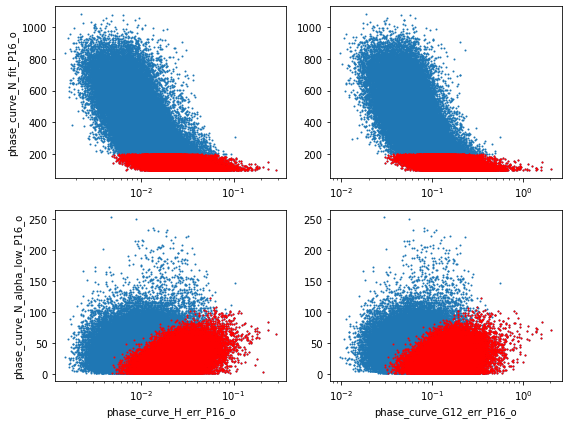

In [64]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o",
#             "phase_angle_range_P16_o","phase_curve_alpha_min_P16_o",
#             "phase_curve_OC_std_P16_o","phase_curve_OC_range_P16_o","phase_curve_OC_mean_P16_o",
#             "phase_curve_N_iter_P16_o","phase_curve_frac_good_fit_P16_o"]

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o","phase_angle_range_P16_o"]

y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)
     )
# mask=((df_atlas["phase_curve_N_fit_P16_o"]>=200)
#                 & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
#      )
df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# df_cut = df_atlas[mask & (df_atlas["phase_curve_OC_range_P16_o"]>2.5)]

# highlight all fits with higher errors
# df_cut = df_atlas[mask & ((df_atlas["phase_curve_H_err_P16_o"]>0.2)
#                  | (df_atlas["phase_curve_G12_err_P16_o"]>0.4))]

df_cut = df_atlas[mask & ((df_atlas["phase_curve_N_fit_P16_o"]<200)
#                  & (df_atlas["phase_curve_N_alpha_low_P16_o"]<25)
#                 & (df_atlas["phase_curve_alpha_min_P16_o"]>3)                         
                         )]

print(len(df_plot),len(df_cut))

# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,df_cut=df_cut)
# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

118100 50550


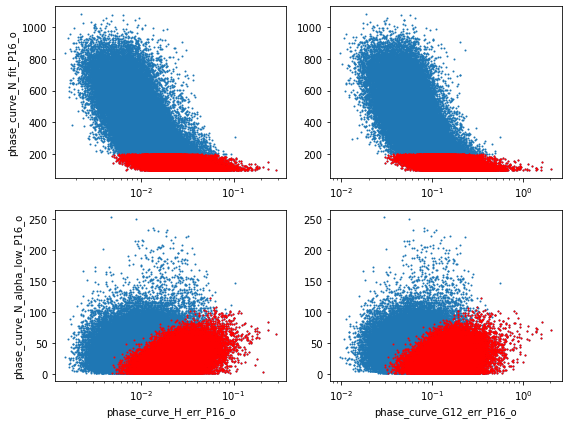

67550 289080


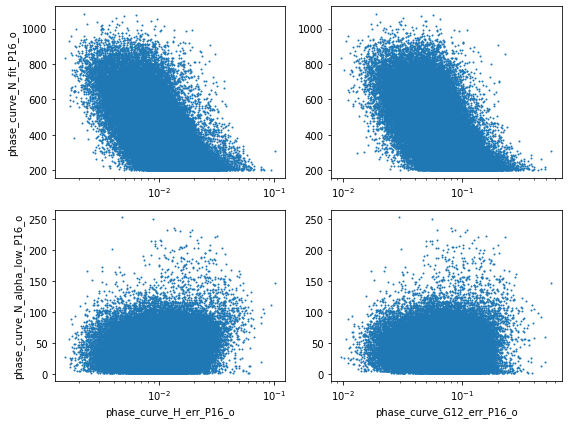

In [65]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o",
#             "phase_angle_range_P16_o","phase_curve_alpha_min_P16_o",
#             "phase_curve_OC_std_P16_o","phase_curve_OC_range_P16_o","phase_curve_OC_mean_P16_o",
#             "phase_curve_N_iter_P16_o","phase_curve_frac_good_fit_P16_o"]

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o","phase_angle_range_P16_o"]

y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)
     )
# mask=((df_atlas["phase_curve_N_fit_P16_o"]>=200)
#                 & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
#      )
df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# df_cut = df_atlas[mask & (df_atlas["phase_curve_OC_range_P16_o"]>2.5)]

# highlight all fits with higher errors
# df_cut = df_atlas[mask & ((df_atlas["phase_curve_H_err_P16_o"]>0.2)
#                  | (df_atlas["phase_curve_G12_err_P16_o"]>0.4))]

df_cut = df_atlas[mask & ((df_atlas["phase_curve_N_fit_P16_o"]<200)
#                  & (df_atlas["phase_curve_N_alpha_low_P16_o"]<25)
#                 & (df_atlas["phase_curve_alpha_min_P16_o"]>3)                         
                         )]

print(len(df_plot),len(df_cut))

# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,df_cut=df_cut)
# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o",
#             "phase_angle_range_P16_o","phase_curve_alpha_min_P16_o",
#             "phase_curve_OC_std_P16_o","phase_curve_OC_range_P16_o","phase_curve_OC_mean_P16_o",
#             "phase_curve_N_iter_P16_o","phase_curve_frac_good_fit_P16_o"]

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o","phase_angle_range_P16_o"]

y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o"]

df_plot=df_atlas
# mask=((df_atlas["phase_curve_N_fit_P16_o"]>=N_fit_cut)
#                 & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=N_alpha_low_cut)
#      )
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=200)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
     )
df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# df_cut = df_atlas[mask & (df_atlas["phase_curve_OC_range_P16_o"]>2.5)]

# highlight all fits with higher errors
# df_cut = df_atlas[mask & ((df_atlas["phase_curve_H_err_P16_o"]>0.2)
#                  | (df_atlas["phase_curve_G12_err_P16_o"]>0.4))]

# df_cut = df_atlas[mask & ((df_atlas["phase_curve_N_fit_P16_o"]<200)
# #                  & (df_atlas["phase_curve_N_alpha_low_P16_o"]<25)
# #                 & (df_atlas["phase_curve_alpha_min_P16_o"]>3)                         
#                          )]

print(len(df_plot),len(df_cut))

# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

In [66]:
df_plot=df_atlas

mask=((df_atlas["phase_curve_N_fit_P16_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
     )

df_plot=df_atlas[mask]
print(len(df_plot))
print(len(df_plot[(df_plot["phase_curve_G12_err_P16_o"]<0.2)
                 & (df_plot["phase_curve_H_err_P16_o"]<0.05)]))

118100
108622


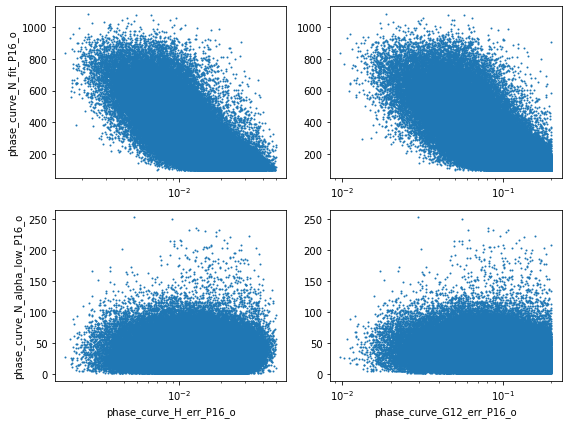

In [67]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o",
#             "phase_angle_range_P16_o","phase_curve_alpha_min_P16_o",
#             "phase_curve_OC_std_P16_o","phase_curve_OC_range_P16_o","phase_curve_OC_mean_P16_o",
#             "phase_curve_N_iter_P16_o","phase_curve_frac_good_fit_P16_o"]

# y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o","phase_angle_range_P16_o"]

y_plot_list=["phase_curve_N_fit_P16_o","phase_curve_N_alpha_low_P16_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
      &(df_plot["phase_curve_G12_err_P16_o"]<0.2)
                 & (df_plot["phase_curve_H_err_P16_o"]<0.05)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# df_cut = df_atlas[mask & (df_atlas["phase_curve_OC_range_P16_o"]>2.5)]

# highlight all fits with higher errors
# df_cut = df_atlas[mask & ((df_atlas["phase_curve_H_err_P16_o"]>0.2)
#                  | (df_atlas["phase_curve_G12_err_P16_o"]>0.4))]



# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

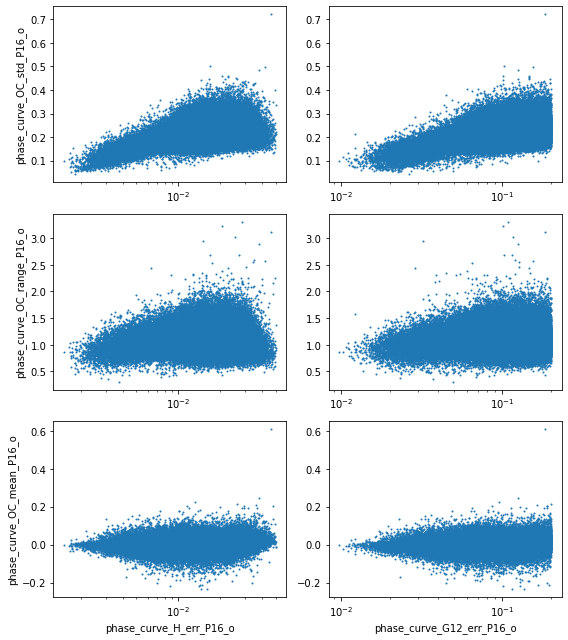

In [68]:
x_plot1="phase_curve_H_err_P16_o"
x_plot2="phase_curve_G12_err_P16_o"
c_plot="phase_curve_N_fit_P16_o"

y_plot_list=["phase_curve_OC_std_P16_o","phase_curve_OC_range_P16_o","phase_curve_OC_mean_P16_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_P16_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
      &(df_plot["phase_curve_G12_err_P16_o"]<0.2)
                 & (df_plot["phase_curve_H_err_P16_o"]<0.05)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

In [69]:
df_plot[~np.isnan(df_plot["phase_curve_OC_std_P16_o"])].sort_values("phase_curve_OC_std_P16_o")[["mpc_number","name","phase_curve_OC_std_P16_o"]]

,mpc_number,name,phase_curve_OC_std_P16_o
323,324.0,Bamberga,0.042177
153,154.0,Bertha,0.051852
91,92.0,Undina,0.054545
580,581.0,Tauntonia,0.054589
89,90.0,Antiope,0.054771
...,...,...,...
137469,140158.0,2001 SX169,0.461238
352106,141593.0,2002 HK12,0.483807
292851,405212.0,2003 QC10,0.498850
9255,9300.0,Johannes,0.501983


In [70]:
df_plot[~np.isnan(df_plot["phase_curve_OC_mean_P16_o"])].sort_values("phase_curve_OC_mean_P16_o")[["mpc_number","name","phase_curve_OC_mean_P16_o"]]

,mpc_number,name,phase_curve_OC_mean_P16_o
25836,25934.0,2001 DC74,-0.234175
69720,70039.0,1999 CL85,-0.232006
69351,69665.0,1998 FQ122,-0.219112
89159,89748.0,2002 AS21,-0.215310
21181,21268.0,1996 KL1,-0.212647
...,...,...,...
102226,103165.0,1999 XN227,0.208870
45018,45184.0,1999 XL155,0.214992
6627,6662.0,1993 BP13,0.222387
352106,141593.0,2002 HK12,0.247420


In [71]:
df_plot[~np.isnan(df_plot["phase_curve_OC_range_P16_o"])].sort_values("phase_curve_OC_range_P16_o")[["mpc_number","name","phase_curve_OC_range_P16_o"]]

,mpc_number,name,phase_curve_OC_range_P16_o
91,92.0,Undina,0.306611
109,110.0,Lydia,0.356046
1030,1031.0,Arctica,0.380946
112,113.0,Amalthea,0.403508
31,32.0,Pomona,0.414744
...,...,...,...
12486,12538.0,1998 OH,2.956630
352408,153814.0,2001 WN5,3.027080
183919,195450.0,2002 GA85,3.110470
137469,140158.0,2001 SX169,3.222470


# look at Trojans
with good fits

In [82]:
mask1=((df_atlas["phase_curve_N_fit_P16_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_P16_o"]>=1)
      &(df_atlas["phase_curve_G12_err_P16_o"]<0.2)
                 & (df_atlas["phase_curve_H_err_P16_o"]<0.05)
     )
mask2 = ((df_atlas["a_semimajor_axis"]>=J_perihelion)
                     & (df_atlas["a_semimajor_axis"]<=J_aphelion))

In [88]:
df_label=pd.read_csv("/Users/jrobinson/asteroid_databases/df_trojans_mpc.csv",index_col=0)

In [90]:
df_label["name"]=np.array([d.split(")")[-1].strip() for d in df_label["name"]])

In [93]:
# df_label[["name","trojan_label"]]

In [96]:
# get trojans from mpcorb label
df_trojan = df_atlas[mask1].merge(df_label[["name","trojan_label"]],on="name",suffixes=["_1","_2"])
print(len(df_trojan))

610


In [97]:
# # get trojans from semimajor axis cuts
# df_trojan = df_atlas[mask1 & mask2]
# print(len(df_trojan))

In [100]:
df_trojan

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_OC_std_B89_o,phase_curve_OC_std_P16_c,phase_curve_OC_std_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_P16_o,phase_curve_frac_good_fit_P16_o,q_perihelion,trojan_label
0,2020-10-20 15:12:33,1153.0,291.0,855.0,59377.617894,2021-06-19 17:56:11,2021-06-18 16:32:20,588.0,Achilles,588.0,...,0.070879,0.104384,0.072500,5.209059,0.147732,10.319962,10.3084,0.985975,4.439513,L4
1,2020-10-20 15:12:33,1447.0,355.0,1091.0,59383.407211,2021-06-19 19:12:27,2021-06-22 07:18:18,617.0,Patroclus,617.0,...,0.069567,0.078556,0.067529,5.212534,0.139545,22.057976,9.6177,0.974113,4.485150,L5
2,2020-10-20 15:12:33,1078.0,268.0,788.0,59267.243519,2021-06-10 00:40:28,2021-06-10 21:06:06,624.0,Hektor,624.0,...,0.074379,0.154925,0.074730,5.265444,0.022558,18.155231,10.5173,0.995620,5.146668,L4
3,2020-10-20 15:12:33,1386.0,395.0,958.0,59264.216528,2021-06-09 22:02:40,2021-06-10 14:11:34,659.0,Nestor,659.0,...,0.106953,0.120348,0.106156,5.165190,0.117289,4.522460,12.4489,0.980022,4.559368,L4
4,2020-10-20 15:12:33,1353.0,339.0,1013.0,59383.527512,2021-06-20 07:09:48,2021-06-22 07:02:41,884.0,Priamus,884.0,...,0.109416,0.130439,0.109179,5.187792,0.124171,8.914834,11.5340,0.959417,4.543620,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2018-06-01 15:39:33,463.0,118.0,345.0,59230.233287,2021-01-18 01:42:43,2021-01-04 10:22:00,264141.0,2009 UG87,264141.0,...,0.171579,0.195148,0.179926,5.230575,0.163476,13.139802,12.8829,0.046512,4.375500,L4
606,2018-09-05 00:36:32,404.0,108.0,296.0,59231.242384,2021-01-19 06:56:14,2020-12-28 02:33:21,316158.0,2009 UW26,316158.0,...,0.197102,0.218380,0.190209,5.228852,0.087076,27.686515,8.8874,0.011111,4.773547,L4
607,NaN,234.0,55.0,179.0,59383.580995,2021-06-19 16:54:10,2021-06-20 06:43:32,73637.0,Guneus,73637.0,...,0.171556,0.163080,0.150344,5.158158,0.185362,12.035323,11.6669,0.055944,4.202030,L4
608,NaN,327.0,85.0,242.0,59383.601748,2021-01-12 03:41:18,2021-06-20 07:50:28,195104.0,2002 CN130,195104.0,...,0.152450,0.101740,0.150975,5.153538,0.088760,31.330561,9.5697,0.051020,4.696112,L4


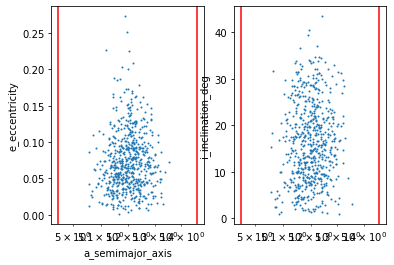

In [98]:
x_plot="a_semimajor_axis"
y_plot1="e_eccentricity"
y_plot2="i_inclination_deg"

df_plot=df_trojan
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot[x_plot],df_plot[y_plot1],s=1,alpha=1)
ax2.scatter(df_plot[x_plot],df_plot[y_plot2],s=1,alpha=1)

ax1.set_ylabel(y_plot1)
ax1.set_xlabel(x_plot)
ax2.set_ylabel(y_plot2)

ax1.set_xscale("log")
ax2.set_xscale("log")

# ax1.set_ylim(0,1)

ax1.axvline(J_aphelion,c="r")
ax2.axvline(J_aphelion,c="r")
ax1.axvline(J_perihelion,c="r")
ax2.axvline(J_perihelion,c="r")

0 0 0 phase_curve_G12_P16_o
1 0 1 phase_curve_G12_err_P16_o
2 0 2 phase_curve_H_P16_o
3 0 3 phase_curve_H_err_P16_o
4 0 4 phase_curve_N_alpha_low_P16_o
5 1 0 phase_curve_N_fit_P16_o
6 1 1 phase_curve_N_iter_P16_o
7 1 2 phase_curve_N_mag_err_P16_o
8 1 3 phase_curve_N_nights_P16_o
9 1 4 phase_curve_alpha_max_P16_o
10 2 0 phase_curve_alpha_min_P16_o
11 2 1 phase_curve_ier_P16_o
12 2 2 phase_curve_nfev_P16_o
13 2 3 phase_curve_OC_mean_P16_o
14 2 4 phase_curve_OC_range_P16_o
15 3 0 phase_curve_OC_std_P16_o
16 3 1 phase_angle_range_P16_o
17 3 2 phase_curve_frac_good_fit_P16_o


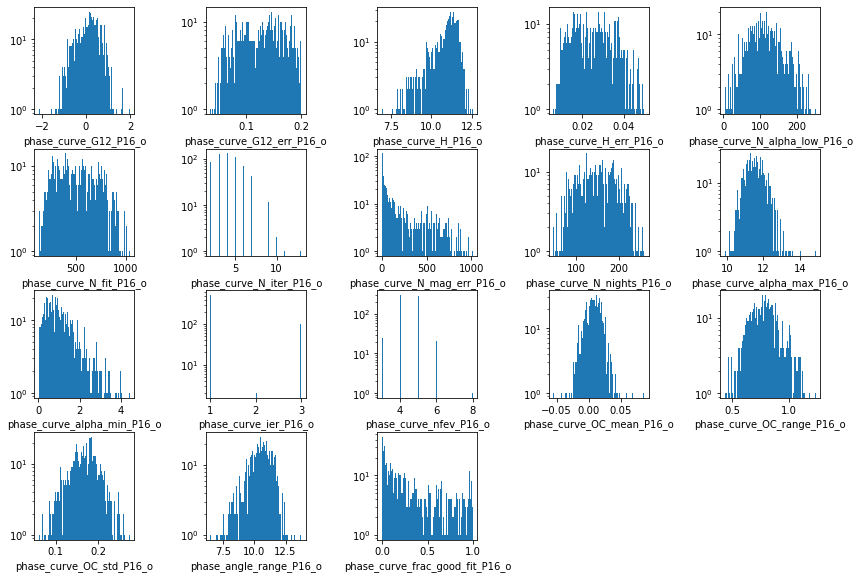

In [99]:
df_plot=df_trojan

x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_plot,x_fig,y_fig,model_params,n_bins,plot_log)

361 249 1.4497991967871486


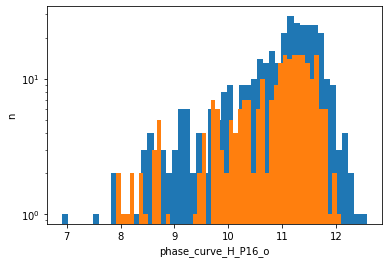

In [109]:
x_plot="phase_curve_H_P16_o"

df_plot1=df_trojan[df_trojan["trojan_label"]=="L4"]
df_plot2=df_trojan[df_trojan["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2),float(len(df_plot1))/len(df_plot2))

x=plt.hist(df_plot1[x_plot],bins=50,log=True,label="L4")
x=plt.hist(df_plot2[x_plot],bins=50,log=True,label="L5")

plt.xlabel(x_plot)
plt.ylabel("n")
plt.show()

361 249


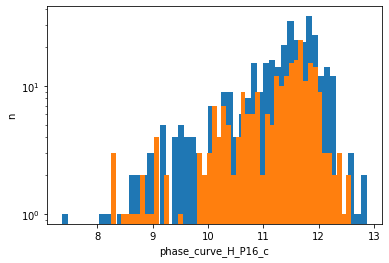

In [105]:
x_plot="phase_curve_H_P16_c"

df_plot1=df_trojan[df_trojan["trojan_label"]=="L4"]
df_plot2=df_trojan[df_trojan["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2))

x=plt.hist(df_plot1[x_plot],bins=50,log=True,label="L4")
x=plt.hist(df_plot2[x_plot],bins=50,log=True,label="L5")

plt.xlabel(x_plot)
plt.ylabel("n")
plt.show()

In [112]:
df_trojan["phase_curve_H_P16_c-o"]=df_trojan["phase_curve_H_P16_c"]-df_trojan["phase_curve_H_P16_o"]
df_trojan["phase_curve_G12_P16_c-o"]=df_trojan["phase_curve_G12_P16_c"]-df_trojan["phase_curve_G12_P16_o"]

361 249


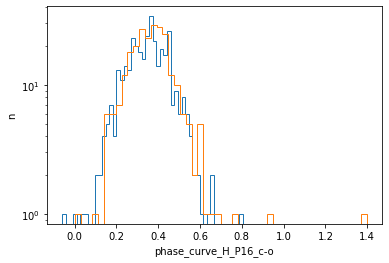

In [108]:
x_plot="phase_curve_H_P16_c-o"

df_plot1=df_trojan[df_trojan["trojan_label"]=="L4"]
df_plot2=df_trojan[df_trojan["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2))

x=plt.hist(df_plot1[x_plot],bins=50,log=True,label="L4",histtype="step")
x=plt.hist(df_plot2[x_plot],bins=50,log=True,label="L5",histtype="step")

plt.xlabel(x_plot)
plt.ylabel("n")
plt.show()

361 249 1.4497991967871486


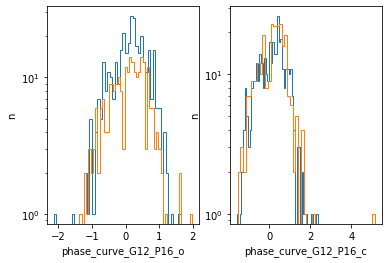

In [113]:
x_plot1="phase_curve_G12_P16_o"
x_plot2="phase_curve_G12_P16_c"

df_plot1=df_trojan[df_trojan["trojan_label"]=="L4"]
df_plot2=df_trojan[df_trojan["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2),float(len(df_plot1))/len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.hist(df_plot1[x_plot1],bins=50,log=True,label="L4",histtype="step")
ax1.hist(df_plot2[x_plot1],bins=50,log=True,label="L5",histtype="step")

ax2.hist(df_plot1[x_plot2],bins=50,log=True,label="L4",histtype="step")
ax2.hist(df_plot2[x_plot2],bins=50,log=True,label="L5",histtype="step")

ax1.set_xlabel(x_plot1)
ax1.set_ylabel("n")
ax2.set_xlabel(x_plot2)
ax2.set_ylabel("n")

plt.show()

361 249 1.4497991967871486


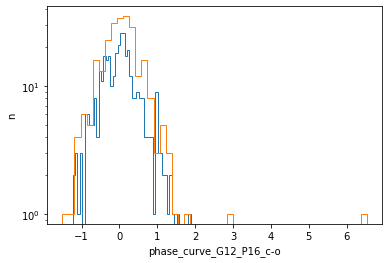

In [114]:
x_plot1="phase_curve_G12_P16_c-o"

df_plot1=df_trojan[df_trojan["trojan_label"]=="L4"]
df_plot2=df_trojan[df_trojan["trojan_label"]=="L5"]

print(len(df_plot1),len(df_plot2),float(len(df_plot1))/len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot1[x_plot1],bins=50,log=True,label="L4",histtype="step")
ax1.hist(df_plot2[x_plot1],bins=50,log=True,label="L5",histtype="step")

ax1.set_xlabel(x_plot1)
ax1.set_ylabel("n")

plt.show()